In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline
#%config InlineBackend.figure_format='retina'  

# requires openpyxl

In [2]:
df=pd.read_excel('LCA-18-asbuilt-20210818.xlsx',sheet_name='Performance summary as-built',header=7,
                usecols='A,Z:AE')
# These are the filter columns. The description in LCA-18 is "filter coating" -- should glass be added??

wavelength=df.iloc[:,0]
u=df['u.3']
g=df['g.3']
r=df['r.3']
i=df['i.3']
z=df['z.3']
y=df['y.3']

df=pd.read_excel('LCA-18-asbuilt-20210818.xlsx',sheet_name='Performance summary as-built',header=7,
                usecols='P:AG')
# these are the L1, L2, L3 columns plus run over the (same as above) filter coatings. 
# The lens columns are not named in the output

L1glass=df.iloc[:,0]
L1BBAR=df.iloc[:,1]
L2glass=df.iloc[:,2]
L2BBAR=df.iloc[:,3]
L3glass=df.iloc[:,16]
L3BBAR=df.iloc[:,17]

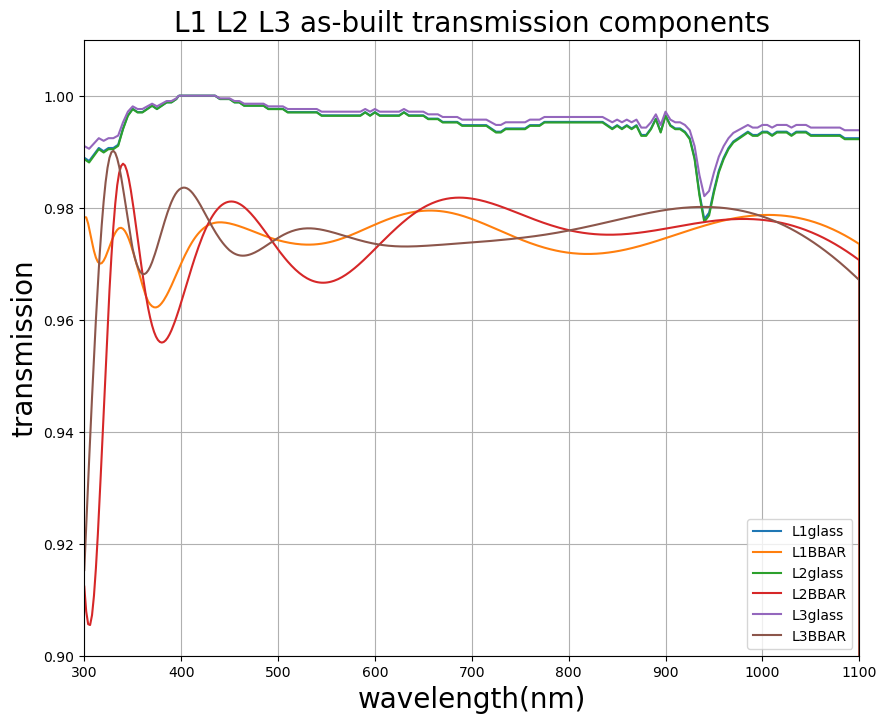

In [3]:
fig = plt.figure(1,[10,8]) # define figure 1
ax = fig.add_subplot() 
ax.set_xlabel('wavelength(nm)',size=20)                 #labels
ax.set_ylabel('transmission',size=20)
ax.set_xlim(300.,1100.)
ax.set_title('L1 L2 L3 as-built transmission components', size=20)
ax.grid(True)                  # form grid
plt.plot(wavelength,L1glass, marker='', linestyle='-',label='L1glass') 
plt.plot(wavelength,L1BBAR, marker='', linestyle='-', label='L1BBAR') 
plt.plot(wavelength,L2glass, marker='', linestyle='-',label='L2glass') 
plt.plot(wavelength,L2BBAR, marker='', linestyle='-', label='L2BBAR') 
plt.plot(wavelength,L3glass, marker='', linestyle='-', label='L3glass') 
plt.plot(wavelength,L3BBAR, marker='', linestyle='-', label='L3BBAR')
ax.set(ylim=(0.9,1.01))
plt.legend()
fsize=20
fweight=500
plt.show();

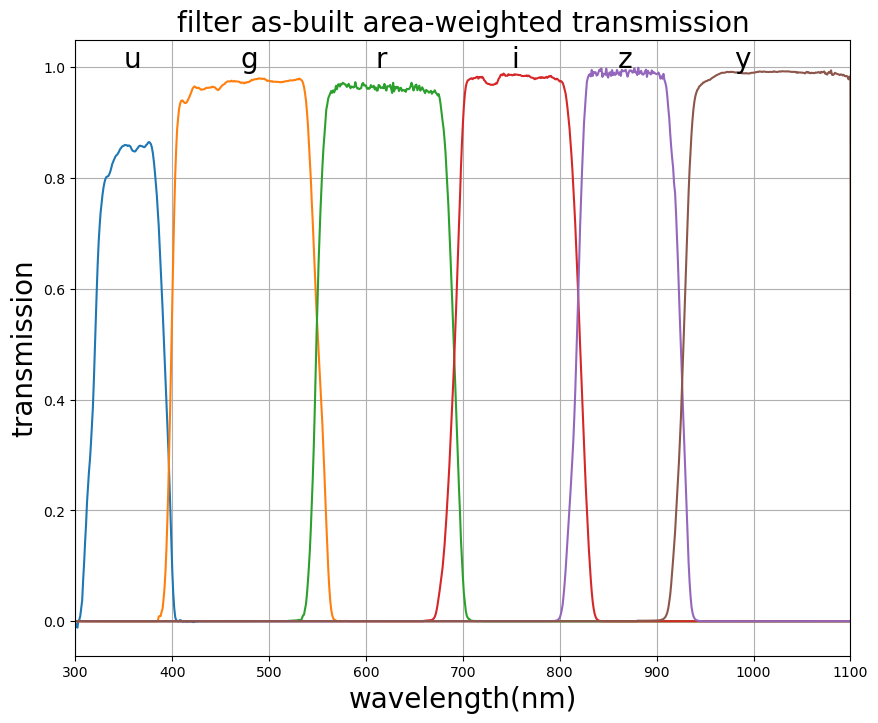

In [4]:
fig = plt.figure(2,[10,8]) # define figure 1
ax = fig.add_subplot() # see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html 
ax.set_xlabel('wavelength(nm)',size=20)                 #labels
ax.set_ylabel('transmission',size=20)
ax.set_xlim(300.,1100.)
ax.set_title('filter as-built area-weighted transmission', size=20)
ax.grid(True)                  # form grid
plt.plot(wavelength,u, marker='', linestyle='-') 
plt.plot(wavelength,g, marker='', linestyle='-') 
plt.plot(wavelength,r, marker='', linestyle='-') 
plt.plot(wavelength,i, marker='', linestyle='-') 
plt.plot(wavelength,z, marker='', linestyle='-') 
plt.plot(wavelength,y, marker='', linestyle='-')
fsize=20
fweight=500
ax.text(350,1.,'u',fontsize=fsize,fontweight=fweight)
ax.text(470,1.,'g',fontsize=fsize,fontweight=fweight)
ax.text(610,1.,'r',fontsize=fsize,fontweight=fweight)
ax.text(750,1.,'i',fontsize=fsize,fontweight=fweight)
ax.text(860,1.,'z',fontsize=fsize,fontweight=fweight)
ax.text(980,1.,'y',fontsize=fsize,fontweight=fweight)
plt.show();

In [5]:
import syseng_throughputs as st
standard_dirs = st.setDefaultDirs()
standard_dirs

{'detector': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/detector/joint_minimum',
 'lens1': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/lens1',
 'lens2': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/lens2',
 'lens3': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/lens3',
 'filters': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/filters',
 'mirror1': '/Users/lynnej/lsst_repos/syseng_throughputs/components/telescope/mirror1',
 'mirror2': '/Users/lynnej/lsst_repos/syseng_throughputs/components/telescope/mirror2',
 'mirror3': '/Users/lynnej/lsst_repos/syseng_throughputs/components/telescope/mirror3',
 'atmosphere': '/Users/lynnej/lsst_repos/syseng_throughputs/siteProperties'}

In [9]:
#output


header = '#Wavelength(nm)   Throughput(0-1)'

with open(os.path.join(standard_dirs['filters'], 'u_band_Response.dat'), 'w') as file:
    file.write(header)
    for k in range (0,801):
        file.write("%.4e\t%.4e\n"%(wavelength[k],u[k]))
        
with open(os.path.join(standard_dirs['filters'], 'g_band_Response.dat'), 'w') as file:
    file.write(header)
    for k in range (0,801):
        file.write("%.4e\t%.4e\n"%(wavelength[k],g[k]))

with open(os.path.join(standard_dirs['filters'], 'r_band_Response.dat'), 'w') as file:
    file.write(header)
    for k in range (0,801):
        file.write("%.4e\t%.4e\n"%(wavelength[k],r[k]))

with open(os.path.join(standard_dirs['filters'], 'i_band_Response.dat'), 'w') as file:
    file.write(header)
    for k in range (0,801):
        file.write("%.4e\t%.4e\n"%(wavelength[k],i[k]))
        
with open(os.path.join(standard_dirs['filters'], 'z_band_Response.dat'), 'w') as file:
    file.write(header)
    for k in range (0,801):
        file.write("%.4e\t%.4e\n"%(wavelength[k],z[k]))
        
with open(os.path.join(standard_dirs['filters'], 'y_band_Response.dat'), 'w') as file:
    file.write(header)
    for k in range (0,801):
        file.write("%.4e\t%.4e\n"%(wavelength[k],y[k]))
        
# Write lens glass 
with open(os.path.join(standard_dirs['lens1'], 'L1_Glass.dat'), 'w') as file:
    file.write(header)
    for k in range(0, 801):
        file.write("%.4e\t%.4e\n" % (wavelength[k], L1glass[k]))
        
with open(os.path.join(standard_dirs['lens2'], 'L2_Glass.dat'), 'w') as file:
    file.write(header)
    for k in range(0, 801):
        file.write("%.4e\t%.4e\n" % (wavelength[k], L2glass[k]))
        
with open(os.path.join(standard_dirs['lens3'], 'L3_Glass.dat'), 'w') as file:
    file.write(header)
    for k in range(0, 801):
        file.write("%.4e\t%.4e\n" % (wavelength[k], L3glass[k]))

# remove coatings
for ll in ['1', '2', '3']:
    files = os.listdir(os.path.join(standard_dirs[f'lens{ll}'], f'l{ll}_Coatings'))
    for f in files:
        os.remove(os.path.join(standard_dirs[f'lens{ll}'], f'l{ll}_Coatings', f))
    
# Write lens bbar
with open(os.path.join(standard_dirs['lens1'], 'l1_Coatings', 'L1_BBAR.dat'), 'w') as file:
    file.write(header)
    for k in range(0, 801):
        file.write("%.4e\t%.4e\n" % (wavelength[k], L1BBAR[k]))
        
with open(os.path.join(standard_dirs['lens2'], 'l2_Coatings', 'L2_BBAR.dat'), 'w') as file:
    file.write(header)
    for k in range(0, 801):
        file.write("%.4e\t%.4e\n" % (wavelength[k], L2BBAR[k]))
        
with open(os.path.join(standard_dirs['lens3'], 'l3_Coatings', 'L3_BBAR.dat'), 'w') as file:
    file.write(header)
    for k in range(0, 801):
        file.write("%.4e\t%.4e\n" % (wavelength[k], L3BBAR[k]))